In [11]:
# Imports needed

from random import randint
import numpy as np
from numpy import asarray
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import plotly.express as px

# Constants for easier changing
NUM_CLASSES = 2 #just testing values
NUM_PICS = 2 #just testing values
EXTENSION = '.jpg'
PATH = './' #folders in here should be numbered
TRAIN_FOLDER = 'train'
TEST_FOLDER = 'test'
INPUT_SIZE = (105, 105)
BATCH_SIZE = 32
VAL_BATCH_SIZE = 8
EPOCHS = 20

In [12]:
#Helper function
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

In [13]:
cuda = torch.cuda.is_available() # True if cuda is available, False otherwise
FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor
print('Training on %s' % ('GPU' if cuda else 'CPU'))

Training on CPU


In [14]:
def get_same_pair(location):
    '''This function produces two normalised image arrays from the same class'''
    transform = torchvision.transforms.Resize(INPUT_SIZE)
    
    random_folder = randint(0,NUM_CLASSES-1)
    random_image = randint(0,NUM_PICS-1)
    img0 = Image.open(PATH+location+'/'+str(random_folder)+'/'+str(random_image)+EXTENSION)
    if(img0.size != (INPUT_SIZE)):
        img0 = transform(img0)
    
    random_image = randint(0,NUM_PICS-1)
    img1 = Image.open(PATH+location+'/'+str(random_folder)+'/'+str(random_image)+EXTENSION)
    if(img1.size != INPUT_SIZE):
        img1 = transform(img1)
    
    img0 = img0.convert("L")
    img1 = img1.convert("L")
    # normalizing the pixel values
    data = asarray(img0), asarray(img1)
    data = asarray(data)
    data = torch.as_tensor(data)
    data = data/255.0
    data = asarray(data)
    data = data.reshape(2,105,105)
    return data



def get_different_pair(location):
    '''This function produces two normalised image arrays from different classes'''
    transform = torchvision.transforms.Resize(INPUT_SIZE)
    
    random_folder0 = randint(0,NUM_CLASSES-1)
    random_image = randint(0,NUM_PICS-1)
    img0 = Image.open(PATH+location+'/'+str(random_folder0)+'/'+str(random_image)+EXTENSION)
    if(img0.size != INPUT_SIZE):
        img0 = transform(img0)
    
    
    random_folder1 = randint(0,NUM_CLASSES-1)
    while (random_folder1 == random_folder0):
        random_folder1 = randint(0,NUM_CLASSES-1)
        
    random_image = randint(0,NUM_PICS-1)
    img1 = Image.open(PATH+location+'/'+str(random_folder1)+'/'+str(random_image)+EXTENSION)
    if(img1.size != INPUT_SIZE):
        img1 = transform(img1)
    
    img0 = img0.convert("L")#turns black and white
    img1 = img1.convert("L")#turns black and white
    # normalizing the pixel values
    data = asarray(img0), asarray(img1)
    data = asarray(data)
    data = torch.as_tensor(data)
    data = data/255.0
    data = asarray(data)
    data = data.reshape(2,105,105)
    #print(data.shape)
    return data

In [15]:
data = get_same_pair(TRAIN_FOLDER)
fig = px.imshow(data[0])
fig.show()

In [16]:
def generate_batch(batch_size):
    '''Generators are functions that generate iterables and then forget them.'''
    
    while 1:
        net_input = []
        net_result = []
        switch=True
        for _ in range(batch_size):
            if switch:
                net_input.append(get_same_pair(TRAIN_FOLDER))#.reshape((2,200,200,4)))
                net_result.append(np.array([0.])) #If images are in the same class output should be 0
            else:
                net_input.append(get_different_pair(TRAIN_FOLDER))#.reshape((2,200,200,4)))
                net_result.append(np.array([1.])) #If the images are different classes, output should be 1
            
            switch=not switch
            
        net_input = asarray(net_input)
        net_result = asarray(net_result)
        img0=net_input[:,0] #Produces the first image in the same(switch==true) or different(switch==false) class
        img1=net_input[:,1] #Produces the second image in the same(switch==true) or different(switch==false) class
        yield [img0,img1],net_result
        
        
def generate_val_batch(batch_size):
    '''Generates the validation batch'''
    while 1:
        net_input = []
        net_result = []
        switch=True
        for _ in range(batch_size):
            if switch:
                net_input.append(get_same_pair(TEST_FOLDER))#.reshape((2,200,200,4)))
                net_result.append(np.array([0.])) #If images are in the same class output should be 0
            else:
                net_input.append(get_different_pair(TEST_FOLDER))#.reshape((2,200,200,4)))
                net_result.append(np.array([1.])) #If the images are different classes, output should be 1
            
            switch=not switch
            
        net_input = asarray(net_input)
        net_result = asarray(net_result)
        img0=net_input[:,0] #Produces the first image in the same(switch==true) or different(switch==false) class
        img1=net_input[:,1] #Produces the second image in the same(switch==true) or different(switch==false) class
        yield [img0,img1],net_result

torch.Size([64, 105, 105])


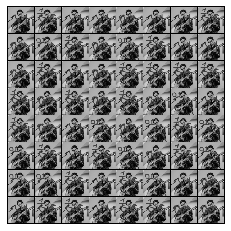

In [17]:
example_training = iter(generate_batch(BATCH_SIZE))
example_batch, result = next(example_training)

concatenated = torch.cat((torch.as_tensor(example_batch[0]), torch.as_tensor(example_batch[1])),0)
#concatenated = concatenated.reshape(16,3,105,105)
print(concatenated.shape)
imshow(torchvision.utils.make_grid(concatenated.reshape(BATCH_SIZE*2, 1,INPUT_SIZE[0], INPUT_SIZE[1])))

#fig = px.imshow(concatenated[0].reshape(INPUT_SIZE[0],INPUT_SIZE[1]))
#fig.show()

In [18]:
def one_shot(model, img0, img1):
    '''Take in an input and compare it to original'''
    valid == False
    # TODO: If difference < threshold
    valid == True
    return valid
    

The layers below take (105,105) image and reduce it to (11,11). 11x11x256 = 30976

In [54]:
#TODO: Put the layers in a network class
net_conv = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11,stride=1),
    nn.ReLU(inplace=True),
    nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
    nn.MaxPool2d(3, stride=2),

    nn.Conv2d(96, 256, kernel_size=5,stride=1,padding=2),
    nn.ReLU(inplace=True),
    nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout2d(p=0.3),

    nn.Conv2d(256,384 , kernel_size=3,stride=1,padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(384,256 , kernel_size=3,stride=1,padding=1),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout2d(p=0.3),)

net_linear = nn.Sequential(
          # First Dense Layer
          nn.Linear(30976, 1024), #This number will change with input size (still needs to change)
          nn.ReLU(inplace=True),
          nn.Dropout2d(p=0.5),
          # Second Dense Layer
          nn.Linear(1024, 128),
          nn.ReLU(inplace=True),
          # Final Dense Layer
          nn.Linear(128,2))

net_conv = net_conv.type(FloatTensor)
net_linear = net_linear.type(FloatTensor)

def one_image(img):
    output = net_conv(img)
    output = output.view(output.size()[0], -1)  
    output = net_linear(output)
    return output


def siamese_process(img0, img1):
    out0 = torch.as_tensor(one_image(torch.as_tensor(img0).reshape(1,1,105,105)))
    out1 = torch.as_tensor(one_image(torch.as_tensor(img1).reshape(1,1,105,105)))
    return torch.cat([out0, out1],0)

Below I've added some cells to test how to input the images from the get_pair() functions to see how im 

In [73]:
#First pass a pair of images through with get_same_pair
images = get_same_pair(TRAIN_FOLDER)
outputs = siamese_process(images[0], images[1])
print(outputs.shape)

torch.Size([2, 2])


In [74]:
#Bits needed for training
#trainer = iter(generate_batch(BATCH_SIZE))
#tester = iter(generate_val_batch(VAL_BATCH_SIZE))
#optimizer = torch.optim.Adam(params=params, lr=0.001)
#params = [x for x in net_conv.parameters()] + [x for x in net_linear.parameters()]

loss = nn.CrossEntropyLoss() #Might end up using custom contrastive loss
losses = loss(outputs, torch.as_tensor([0, 0]))
print(losses.item())

0.6670414805412292


In [ ]:
#TODO: Pass a batch through with enumerate without training anything

In [ ]:
#TODO: Download a dataset (maybe the xbox one or signatures)

In [ ]:
#TODO: Write full training function with validation every so often (probably tomorrow)

In [ ]:
#TODO: Train it and test it